The purpose of SOM is reducing dimensionality in the datasets, i.e. the amount of columns. SOM is an unsupervised learning algoritmh for Deep Learning.

This SOM will be built on top of `Minisom`.

Libraries

In [1]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pylab import bone, pcolor, colorbar, plot, show

# Data Preprocessing

Reading the Dataset

In [2]:
dataset = pd.read_csv("/content/Credit_Card_Applications.csv")

Features and Target

In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature Scaling

In [4]:
scaler = MinMaxScaler(feature_range = (0, 1))
x = scaler.fit_transform(x)

# SOM Training

Create the SOM Object

In [5]:
# x, y -> The dimension of the map
# input_len -> The input shape
# sigma -> The radius of each neighbors
# learning_rate -> How much the weights will be updated
# There is also decay_functions and random_seed 
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

Initialize the Weight

In [6]:
som.random_weights_init(x)

Train the SOM

In [7]:
# Only use the x, without the y because it is an unsupervised algorithm
som.train_random(data = x, num_iteration = 100)

# Visualizing the SOM

Fraud Detection

In [8]:
# We can identify frauds from the credits card by observing nodes that have highest MID
# Basically, MID (Mean Interneuron Distance) are distances between neurons
# If there are neurons with much more differences value with other neurons, then most likely it is a fraud
# In this visualization, high MID will be determined by the whiter the color of each neurons are

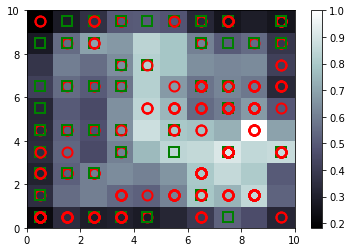

In [9]:
# Initialize the Window
bone()

# Putting the Neighboring Neurons
pcolor(som.distance_map().T)

# Adding Color Legends to the Chart
colorbar()

# Approval Markers
markers = ["o", "s"]
colors = ["r", "g"]

# Associate Data to Markers
# x, y in plot -> The position of the winning node

for idx, features in enumerate(x):
  w = som.winner(features)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[idx]],
       markeredgecolor = colors[y[idx]],
       markerfacecolor = "None",
       markersize = 10,
       markeredgewidth = 2,
       )

# Show the Graph
show()

# Get Specific Fraud Data

Get All Winning Nodes and Customers Mapping

In [10]:
mappings = som.win_map(x)

Get Lists of Fraud Customers

In [11]:
# Dangerous hard-coded code for the mappings
frauds = np.concatenate((mappings[(8, 1)], mappings[(6, 8)]), axis = 0)

Inverse Scaling the Transformed Data

In [12]:
frauds = scaler.inverse_transform(frauds)

In [13]:
frauds

array([[1.5704581e+07, 1.0000000e+00, 2.3750000e+01, 4.1500000e-01,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.2800000e+02, 7.0000000e+00],
       [1.5761854e+07, 1.0000000e+00, 3.1250000e+01, 2.8350000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 5.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.7600000e+02, 1.4700000e+02],
       [1.5725776e+07, 1.0000000e+00, 2.3080000e+01, 0.0000000e+00,
        2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.1000000e+01, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5815040e+07, 1.0000000e+00, 1.9000000e+01, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        2.0000000e+00,